# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Creat my project director as path
path = r"C:\Users\Poory\OneDrive\Desktop\project\Cancer Prediction"

In [4]:
# Change default setting of Jupyter notebook
pd.set_option('display.max_rows' , 200 )
pd.set_option('display.max_columns' , 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Import ".json" file for the U.S. 

# I downloaded this GeoJSON File from Here : (https://github.com/PublicaMundi/MappingAPI/tree/master/data/geojson)

country_geo = (os.path.join(path, '02 Data', 'Original Data', 'us-states.json'))

In [6]:
# look at the JSON file contents

# returns JSON object as a dictionary
data = json.load(open((os.path.join(path, '02 Data', 'Original Data', 'us-states.json'))))

# Iterating through the json list
for i in data['features']:
    print(i)
    break

{'type': 'Feature', 'id': '01', 'properties': {'name': 'Alabama', 'density': 94.65}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}


In [7]:
# Import the main data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [8]:
df.head()

,State,Year,State_Year,Gender,Leading_Cancer_Sites,Incidence_Counts,Incidence_Age_Adjusted_Rate,Death_Counts,Mortality_Age_Adjusted_Rate,Mortality_Incidence_Age_Adjusted_Rate_Ratio,Population,%_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,%_Low_birthweight,%_Adult_smoking,%_Adults_with_Obesity,%_Physically_Inactive,%_Excessive_Drinking,%_Uninsured,Primary_Care_Physicians_Rate,Mental_Health_Provider_Rate,%_With_Annual_Mammogram,%_Unemployed,%_Children_in_Poverty,Average_Daily_PM2.5,%_Severe_Housing_Problems,%_Adults_with_Diabetes,Median_Household_Income,%_Less_Than_18_Years_of_Age,%_65_and_Over,%_Black,%_American_Indian_&_Alaska_Native,%_Asian,%_Native_Hawaiian/Other_Pacific_Islander,%_Hispanic,%_Non_Hispanic_White,%_Female,%_Rural,Region
0,Alabama,2010,Alabama2010,Male,Prostate,3872,151.08,544,27.67,0.18,2323013,22.66,4.63,4.26,10.23,23.37,33.62,32.80,10.45,17.64,49.16,19.80,60.94,12.07,26.43,3.27,28.40,13.06,37179,23.70,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
1,Alabama,2011,Alabama2011,Male,Prostate,3817,146.45,544,26.61,0.18,2328518,22.66,4.65,4.29,10.35,22.76,35.13,33.18,10.54,17.14,49.16,7.16,62.95,11.20,31.99,3.27,27.41,13.90,36340,23.70,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
2,Alabama,2012,Alabama2012,Male,Prostate,3412,127.56,461,22.07,0.17,2336196,22.53,4.52,4.22,10.55,22.09,35.09,33.14,10.95,17.55,42.61,10.91,62.74,10.46,31.75,12.87,28.32,13.88,36508,23.17,15.38,28.29,0.78,0.65,0.11,3.38,65.86,51.30,66.70,South
3,Alabama,2013,Alabama2013,Male,Prostate,3318,120.95,470,22.13,0.18,2343135,23.28,4.66,4.44,10.55,22.43,35.08,33.55,11.68,17.42,42.93,35.21,60.53,8.57,32.15,12.79,14.47,14.08,37055,22.95,16.03,28.31,0.78,0.65,0.11,3.32,65.89,51.31,67.09,South
4,Alabama,2014,Alabama2014,Male,Prostate,3103,109.17,467,21.30,0.20,2348012,23.28,4.66,4.44,10.58,22.43,35.29,31.79,11.68,16.49,42.86,43.65,60.65,7.67,32.55,12.79,15.13,14.48,38019,22.56,16.49,28.28,0.79,0.72,0.11,3.47,65.60,51.24,67.09,South


In [9]:
df.shape

(6171, 40)

#### Here, I would like to create a new subset of the main data frame specific to Lung and Bronchus cancer. Then I want to group the data by each state in order to prepare for creating a map using folium.

In [10]:
# I would like to create a map that displays the average mortality rate of lung and bronchus cancer in each state in the US from 2010 to 2020.

Related_Columns = ['State', 'Year', 'Leading_Cancer_Sites', 'Incidence_Age_Adjusted_Rate', 'Mortality_Age_Adjusted_Rate']

df_lb = df.loc[(df['Leading_Cancer_Sites'] == 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), Related_Columns].reset_index(drop=True)
df_lb.head()

,State,Year,Leading_Cancer_Sites,Incidence_Age_Adjusted_Rate,Mortality_Age_Adjusted_Rate
0,Alabama,2010,Lung and Bronchus,73.22,59.72
1,Alabama,2011,Lung and Bronchus,71.93,56.86
2,Alabama,2012,Lung and Bronchus,70.31,54.18
3,Alabama,2013,Lung and Bronchus,67.84,54.78
4,Alabama,2014,Lung and Bronchus,65.98,52.68


In [11]:
# Here, I want to use the group by function to create a map with just two columns: state and the average mortality rate for each state from 2010 to 2020.

Avg_mortality = df_lb.groupby('State')['Mortality_Age_Adjusted_Rate'].mean().reset_index()
Avg_mortality.columns = ['State', 'Mean_Mortality_Rate']
Avg_mortality.head()


,State,Mean_Mortality_Rate
0,Alabama,50.07
1,Alaska,40.52
2,Arizona,32.34
3,Arkansas,54.60
4,California,29.49


### Conduct consistency checks

In [12]:
#Check Missing Values
Avg_mortality.isnull().sum()

State                  0
Mean_Mortality_Rate    0
dtype: int64

In [13]:
# Check Duplicates
df_dups = Avg_mortality[Avg_mortality.duplicated()]
df_dups

,State,Mean_Mortality_Rate


C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mean_Mortality_Rate', ylabel='Count'>

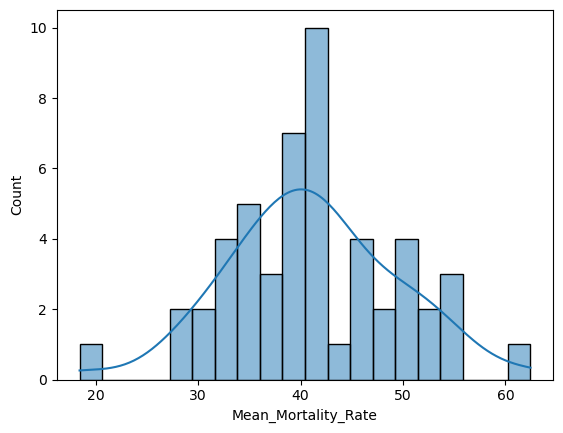

In [14]:
# Check the Mean_Mortality_Rate variable

sns.histplot(Avg_mortality['Mean_Mortality_Rate'], bins=20, kde = True)


### 4. Plotting a choropleth

In [15]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], 
                 tiles="Cartodb Positron",
                 zoom_start = 4.2 )

# Choropleth maps bind Pandas Data Frames and JSON geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = Avg_mortality,
    columns = ['State', 'Mean_Mortality_Rate'],
    key_on = 'feature.properties.name', # This part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.7, line_opacity=0.5,
    legend_name = "Mean Mortality Rate").add_to(map)

folium.LayerControl().add_to(map)
map.save(os.path.join(path, '04 Analysis', 'Visualizations','plot_data_1.html'))
map

## Now, I want to take it a step further and create a map that displays both incidence rates using color and mortality rates as circle sizes. To create such a map, I received assistance from our dear friend ChatGPT:

In [16]:
# First I need to create another data frame that includes both
# The mean Incidence rate and the mean Mortality rate of Lung and Bronchus cancer for each state:

new_df = df_lb.groupby('State')[['Incidence_Age_Adjusted_Rate','Mortality_Age_Adjusted_Rate']].mean().reset_index()
new_df.columns = ['State', 'Mean_Incidence_Rate', 'Mean_Mortality_Rate']
new_df.head()

,State,Mean_Incidence_Rate,Mean_Mortality_Rate
0,Alabama,64.97,50.07
1,Alaska,57.74,40.52
2,Arizona,46.60,32.34
3,Arkansas,75.10,54.60
4,California,41.53,29.49


### To create a map that fills each state with color based on the cancer incidence rate and adds circles with sizes based on the mortality rate, I need to use Folium’s Choropleth for the color fill and CircleMarker for the markers. Here's how we can do it:

##### 1. First, Create the base map.
##### 2. Add a choropleth layer for the cancer incidence rate.
##### 3. Add circle markers for the mortality rate.

### 
In order to use folium.CircleMarker, we need to obtain the latitude and longitude for each state. To do this, we can create a dictionary that maps state names to their respective coordinates. I asked chatGPT to help create this dictionary for each state along with their related coordinats.:

In [17]:
state_coordinates = {'Alabama': [32.806671, -86.791130],'Alaska': [61.370716, -152.404419],'Arizona': [33.729759, -111.431221],
'Arkansas': [34.969704, -92.373123],'California': [36.116203, -119.681564],'Colorado': [39.059811, -105.311104],'Connecticut': [41.597782, -72.755371],
'Delaware': [39.318523, -75.507141],'Florida': [27.766279, -81.686783],'Georgia': [33.040619, -83.643074], 'District of Columbia' : [38.942142, -77.025955],
'Hawaii': [21.094318, -157.498337],'Idaho': [44.240459, -114.478828],'Illinois': [40.349457, -88.986137],'Indiana': [39.849426, -86.258278],
'Iowa': [42.011539, -93.210526],'Kansas': [38.526600, -96.726486],'Kentucky': [37.668140, -84.670067],'Louisiana': [31.169546, -91.867805],
'Maine': [44.693947, -69.381927],'Maryland': [39.063946, -76.802101],'Massachusetts': [42.230171, -71.530106],'Michigan': [43.326618, -84.536095],
'Minnesota': [45.694454, -93.900192],'Mississippi': [32.741646, -89.678696],'Missouri': [38.456085, -92.288368],'Montana': [46.921925, -110.454353],
'Nebraska': [41.125370, -98.268082],'Nevada': [38.313515, -117.055374],'New Hampshire': [43.452492, -71.563896],'New Jersey': [40.298904, -74.521011],
'New Mexico': [34.840515, -106.248482],'New York': [42.165726, -74.948051],'North Carolina': [35.630066, -79.806419],'North Dakota': [47.528912, -99.784012],
'Ohio': [40.388783, -82.764915],'Oklahoma': [35.565342, -96.928917],'Oregon': [44.572021, -122.070938],'Pennsylvania': [40.590752, -77.209755],
'Rhode Island': [41.680893, -71.511780],'South Carolina': [33.856892, -80.945007],'South Dakota': [44.299782, -99.438828],'Tennessee': [35.747845, -86.692345],
'Texas': [31.054487, -97.563461],'Utah': [40.150032, -111.862434],'Vermont': [44.045876, -72.710686],'Virginia': [37.769337, -78.169968],
'Washington': [47.400902, -121.490494],'West Virginia': [38.491226, -80.954456],'Wisconsin': [44.268543, -89.616508],'Wyoming': [42.755966, -107.302490]
}

In [18]:
# Now, we need a function that gets each state coordinates:
def get_state_coordinates(state):
    return state_coordinates.get(state, [0, 0])  # Default to [0, 0] if state not found

### Now we have every thing to create our map:

In [19]:
# Get coordinates for each state
new_df['Coordinates'] = new_df['State'].apply(get_state_coordinates)


# Create the base map
map = folium.Map(location = [40, -95], tiles="Cartodb Positron", zoom_start = 4.2 )


# Create a choropleth map for cancer incidence rate
folium.Choropleth(
    geo_data=country_geo,
    data=new_df,
    columns=['State', 'Mean_Incidence_Rate'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
    legend_name="Cancer Incidence Rate"
).add_to(map)

# Add circle markers for the mean mortality rate
for _, row in new_df.iterrows():
    folium.CircleMarker(
        location=row['Coordinates'],
        radius=row['Mean_Mortality_Rate'] / 4,  # Adjust the divisor to get appropriate circle sizes
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['State']}<br>Mortality Rate: {row['Mean_Mortality_Rate']}")
    ).add_to(map)

# Add layer control to the map
folium.LayerControl().add_to(map)
map.save(os.path.join(path, '04 Analysis', 'Visualizations','plot_data_2.html'))
# Display the map
map


##### I created a dictionary with the latitude and longitude coordinates for each of the 50 U.S. states, allowing us to map data points accurately. This dictionary was integrated into a pandas DataFrame, adding a 'Coordinates' column for each state. Using this DataFrame, I generated a choropleth map with folium to visualize cancer incidence rates across states and added circle markers representing mean mortality rates. The circle markers' sizes correspond to the mortality rates, providing a comprehensive visual representation of both cancer incidence and mortality across the states.

#### Based on what we have learned so far, I want to create another choropleth map that displays the mortality rate of lungs and bronchus cancer alongside the median household income. This will provide a better understanding of the relationship between these two variables.

In [20]:
# 1. Create our desired data frame:
Related_Columns = ['State', 'Year', 'Leading_Cancer_Sites', 'Median_Household_Income', 'Mortality_Age_Adjusted_Rate']

df_lb2 = df.loc[(df['Leading_Cancer_Sites'] == 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), Related_Columns].reset_index(drop=True)

In [21]:
# 2. Make our data frame ready to displays map:
new_df2 = df_lb2.groupby('State')[['Median_Household_Income','Mortality_Age_Adjusted_Rate']].mean().reset_index()
new_df2.columns = ['State', 'Mean_Median_Household_Income', 'Mean_Mortality_Rate']
new_df2.head()

,State,Mean_Median_Household_Income,Mean_Mortality_Rate
0,Alabama,40744.18,50.07
1,Alaska,61841.45,40.52
2,Arizona,46254.45,32.34
3,Arkansas,39064.45,54.60
4,California,59924.82,29.49


In [22]:
# 3. Let's Create our map:
# Get coordinates for each state
new_df2['Coordinates'] = new_df2['State'].apply(get_state_coordinates)


# Create the base map
map = folium.Map(location = [40, -95], tiles="Cartodb Positron", zoom_start = 4.2 )


# Create a choropleth map for Household Income
folium.Choropleth(
    geo_data=country_geo,
    data=new_df2,
    columns=['State', 'Mean_Median_Household_Income'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
    legend_name="Average Median Household Income of Each State",
).add_to(map)

# Add circle markers for the mean mortality rate
for _, row in new_df2.iterrows():
    folium.CircleMarker(
        location=row['Coordinates'],
        radius=row['Mean_Mortality_Rate'] / 4,  # Adjust the divisor to get appropriate circle sizes
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['State']}<br>Mortality Rate: {row['Mean_Mortality_Rate']}<br>Household Income: {row['Mean_Median_Household_Income']}")
    ).add_to(map)

# Add layer control to the map
folium.LayerControl().add_to(map)
map.save(os.path.join(path, '04 Analysis', 'Visualizations','plot_data_3.html'))
# Display the map
map


#### The data suggests a general trend where states with higher household incomes typically exhibit lower mortality rates, while states with lower household incomes tend to have higher mortality rates. This correlation underscores socioeconomic factors impacting health outcomes. 

#### However, notable exceptions exist; for instance, New Mexico shows a low household income alongside a relatively low mortality rate, challenging the direct relationship between income and mortality. Moreover, certain states with moderate household incomes demonstrate lower mortality rates compared to states with substantially higher median incomes,
### indicating that other factors beyond income alone influence health outcomes across different states.

In [23]:
# Now, I want to create another choropleth map that displays the mortality rate of Colon and Rectum Cancer alongside the Percentage of adults who smoke. 
# This will provide a better understanding of the relationship between these two variables.

# 1. Create our desired data frame:
Related_Columns = ['State', 'Year', 'Leading_Cancer_Sites', '%_Adult_smoking', 'Mortality_Age_Adjusted_Rate']

df_cr = df.loc[(df['Leading_Cancer_Sites'] == 'Colon and Rectum') & (df['Gender'] == 'Male & Female'), Related_Columns].reset_index(drop=True)

# 2. Make our data frame ready to display map:
new_df3 = df_cr.groupby('State')[['%_Adult_smoking','Mortality_Age_Adjusted_Rate']].mean().reset_index()
new_df3.columns = ['State', '%_Adult_smoking', 'Mean_Mortality_Rate']
new_df3.head()


,State,%_Adult_smoking,Mean_Mortality_Rate
0,Alabama,21.48,15.66
1,Alaska,24.38,15.26
2,Arizona,17.44,12.72
3,Arkansas,22.96,16.37
4,California,13.40,12.86


In [24]:
# 3. Let's Create our map:
# Get coordinates for each state
new_df3['Coordinates'] = new_df3['State'].apply(get_state_coordinates)


# Create the base map
map = folium.Map(location = [40, -95], tiles="Cartodb Positron", zoom_start = 4.2 )


# Create a choropleth map for the Percentage of adults who smoke
folium.Choropleth(
    geo_data=country_geo,
    data=new_df3,
    columns=['State', '%_Adult_smoking'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
    legend_name="Percentage of adults who smoke",
).add_to(map)

# Add circle markers for the mean mortality rate
for _, row in new_df3.iterrows():
    folium.CircleMarker(
        location=row['Coordinates'],
        radius=row['Mean_Mortality_Rate'] / 1.8,  # Adjust the divisor to get appropriate circle sizes
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['State']}<br>Mortality Rate: {row['Mean_Mortality_Rate']}<br>Percentage of adults who smoke: {row['%_Adult_smoking']}")
    ).add_to(map)

# Add layer control to the map
folium.LayerControl().add_to(map)
map.save(os.path.join(path, '04 Analysis', 'Visualizations','plot_data_4.html'))
# Display the map
map

#### The visualization above presents smoking rates as color gradients and the mortality rate for Colon and Rectum cancer as size-adjusted circles across states. Notably, the mortality rate for this cancer type appears consistent across states, ranging between 10 to 18. 

#### However, states like Tennessee, Kentucky, and West Virginia stand out with notably high percentages of adult smokers. A clear trend emerges where states with lower smoking rates tend to exhibit lower mortality rates for Colon and Rectum cancer, while those with higher smoking rates often have higher mortality rates

#### Although there is a strong correlation between these two variables in our heatmap (r=0.71), it's a bit challenging to come to the same conclusion when visualizing this relationship.